In [559]:
#모듈 로딩
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [560]:
mpg = pd.read_csv('../dataset/auto-mpg.csv')

mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [561]:
print(f'결측치 {mpg.isnull().sum().sum()}')
print(f'0값?: {mpg.describe()}')

결측치 0
0값?:               mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


In [562]:

mpg.rename(columns={'car name': 'car_name'}, inplace=True)
mpg['origin'] = mpg['origin'].astype('category')
mpg_copy= mpg.copy()

In [563]:
for col in mpg.columns:
    print(f'{col}')
    print(f'{mpg[col].unique}')

mpg
<bound method Series.unique of 0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64>
cylinders
<bound method Series.unique of 0      8
1      8
2      8
3      8
4      8
      ..
393    4
394    4
395    4
396    4
397    4
Name: cylinders, Length: 398, dtype: int64>
displacement
<bound method Series.unique of 0      307.0
1      350.0
2      318.0
3      304.0
4      302.0
       ...  
393    140.0
394     97.0
395    135.0
396    120.0
397    119.0
Name: displacement, Length: 398, dtype: float64>
horsepower
<bound method Series.unique of 0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: object>
weight
<bound method Series.unique of 0      3504
1      3693
2      3436
3      3433
4      3449
       ... 
393    2790
394    2130
395    2295
396    2625
397   

In [564]:
#같은 차종의 마력의 평균으로 '?'대체
ques_car_name=mpg[mpg['horsepower']== '?'].car_name
mean_list=[]

x1 = mpg[mpg['car_name']==ques_car_name.iloc[0]].horsepower[1:].astype('int').mean()
x2 = mpg[mpg['car_name']==ques_car_name.iloc[1]].horsepower[mpg[mpg['car_name']==ques_car_name.iloc[1]].horsepower != '?'].astype('int').mean()
mpg.loc[32,'horsepower']= x1
mpg.loc[126,'horsepower']=x2
mpg.drop(mpg[mpg['horsepower']=='?'].index, inplace=True)
mpg['horsepower'].value_counts()
mpg['horsepower'] = mpg['horsepower'].astype('int64')



In [566]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           394 non-null    float64 
 1   cylinders     394 non-null    int64   
 2   displacement  394 non-null    float64 
 3   horsepower    394 non-null    int64   
 4   weight        394 non-null    int64   
 5   acceleration  394 non-null    float64 
 6   model year    394 non-null    int64   
 7   origin        394 non-null    category
 8   car_name      394 non-null    object  
dtypes: category(1), float64(3), int64(4), object(1)
memory usage: 28.2+ KB


In [567]:
mpg[mpg.columns[2:-2]]

,displacement,horsepower,weight,acceleration,model year
0,307.0,130,3504,12.0,70
1,350.0,165,3693,11.5,70
2,318.0,150,3436,11.0,70
3,304.0,150,3433,12.0,70
4,302.0,140,3449,10.5,70
...,...,...,...,...,...
393,140.0,86,2790,15.6,82
394,97.0,52,2130,24.6,82
395,135.0,84,2295,11.6,82
396,120.0,79,2625,18.6,82


In [568]:
#표준화 데이터
ss_data = StandardScaler()

mpg_df = ss_data.fit_transform(mpg[mpg.columns[2:-2]])
mpg_df = pd.DataFrame(mpg_df,columns=mpg.columns[2:-2])
mpg_df
mpg_df = pd.concat([mpg_df, mpg['mpg']], axis=1)
mpg_df

,displacement,horsepower,weight,acceleration,model year,mpg
0,1.081071,0.668219,0.624255,-1.290037,-1.620283,18.0
1,1.493114,1.580208,0.847271,-1.471537,-1.620283,15.0
2,1.186478,1.189356,0.544017,-1.653038,-1.620283,18.0
3,1.052324,1.189356,0.540477,-1.290037,-1.620283,16.0
4,1.033159,0.928787,0.559357,-1.834539,-1.620283,17.0
...,...,...,...,...,...,...
393,-0.720418,-0.582509,-0.300846,1.396173,1.640977,27.0
394,NaN,NaN,NaN,NaN,NaN,44.0
395,NaN,NaN,NaN,NaN,NaN,32.0
396,NaN,NaN,NaN,NaN,NaN,28.0


### [1]단순 선형회귀
- 피쳐: 무게(weight)
- 타겟: 연비(mpg)

In [327]:
mpg_df.corr()

,cylinders,displacement,horsepower,weight,acceleration,model year
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


In [328]:
mpg_df

,cylinders,displacement,horsepower,weight,acceleration,model year
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315
...,...,...,...,...,...,...
387,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,1.636410
388,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410
389,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410
390,-0.864014,-0.712005,-0.662540,-0.415627,1.110088,1.636410


In [307]:
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


In [331]:
for i in mpg_df.columns:
    mpg_data = np.array(mpg_df[i]).reshape(-1, 1)
    mpg_target = np.array(mpg['mpg']).reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(mpg_data, mpg_target, test_size=0.2, random_state=102)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    #MSE
    r2 = r2_score(y_test, y_pred)
    print(f'{i}와 mpg')
    print(f'회귀계수 {lr.coef_}, 상수 {lr.intercept_}')
    print(f'MSE = {round(mse,3)}')
    print(f'R^2 = {round(r2,3)}')
    print()

cylinders와 mpg
회귀계수 [[-6.03928626]], 상수 [23.25130611]
MSE = 24.065
R^2 = 0.608

displacement와 mpg
회귀계수 [[-6.19676262]], 상수 [23.31257045]
MSE = 20.614
R^2 = 0.664

horsepower와 mpg
회귀계수 [[-5.94827009]], 상수 [23.40678343]
MSE = 21.672
R^2 = 0.647

weight와 mpg
회귀계수 [[-6.4240011]], 상수 [23.37642931]
MSE = 19.716
R^2 = 0.679

acceleration와 mpg
회귀계수 [[3.10692766]], 상수 [23.26207354]
MSE = 45.29
R^2 = 0.262

model year와 mpg
회귀계수 [[4.48473529]], 상수 [23.21896917]
MSE = 39.459
R^2 = 0.357



In [380]:
orgin_dummy = pd.get_dummies(mpg['origin'], prefix='origin')
model_year = pd.get_dummies(mpg['model year'], prefix='model year')
cylinders = pd.get_dummies(mpg['cylinders'], prefix='cylinders')
mpg_df = pd.concat([mpg_df, cylinders], axis=1)
mpg_df = pd.concat([mpg_df, model_year], axis=1)
mpg_df = pd.concat([mpg_df, orgin_dummy], axis=1)


In [381]:
mpg.drop(['cylinders','model year', 'origin', 'car_name'], axis=1, inplace=True)

In [347]:
mpg

,mpg,displacement,horsepower,weight,acceleration,model year_70,model year_71,model year_72,model year_73,model year_74,...,model year_81,model year_82,origin_1,origin_2,origin_3,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,18.0,307.0,130,3504,12.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,15.0,350.0,165,3693,11.5,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,18.0,318.0,150,3436,11.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,16.0,304.0,150,3433,12.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,17.0,302.0,140,3449,10.5,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,140.0,86,2790,15.6,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
394,44.0,97.0,52,2130,24.6,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
395,32.0,135.0,84,2295,11.6,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
396,28.0,120.0,79,2625,18.6,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0


### [2]폴리노미얼 회귀
- 피처: displacement
- target: 연비

In [336]:
X_train, X_test, y_train, y_test = train_test_split(mpg_data, mpg_data, test_size=0.2, random_state=102)

degree = [1,2,3,5,10]
for i in mpg_df.columns:
    for j in range(len(degree)):
        mpg_data = np.array(mpg_df[i]).reshape(-1, 1)
        mpg_target = np.array(mpg['mpg']).reshape(-1, 1)

        poly_feat = PolynomialFeatures(degree=degree[j],include_bias=False)
        lr = LinearRegression()
        pipeline = Pipeline([('poly',poly_feat),('lr',lr)])
        pipeline.fit(mpg_data,mpg_target)
        
        score = cross_val_score(pipeline,mpg_data, mpg_target, cv=5, scoring= 'neg_mean_squared_error')
        coef = pipeline.named_steps['lr'].coef_
        print(f'{i}의 플리노미얼 회귀 타겟은 MPG')
        print(f'Degree {degree[j]}의 회귀계수는 {np.round(coef,2)}')
        print(f'MSE는 {-1*np.mean(score):.2f}')
        print()

cylinders의 플리노미얼 회귀 타겟은 MPG
Degree 1의 회귀계수는 [[-6.06]]
MSE는 29.66

cylinders의 플리노미얼 회귀 타겟은 MPG
Degree 2의 회귀계수는 [[-6.41  0.69]]
MSE는 29.63

cylinders의 플리노미얼 회귀 타겟은 MPG
Degree 3의 회귀계수는 [[-12.47  -3.05   4.96]]
MSE는 27.31

cylinders의 플리노미얼 회귀 타겟은 MPG
Degree 5의 회귀계수는 [[ 3.30665679e+11 -2.47362766e+12 -3.05220542e+12  1.06149441e+12
   1.32998199e+12]]
MSE는 28.43

cylinders의 플리노미얼 회귀 타겟은 MPG
Degree 10의 회귀계수는 [[-1.46825551e+10  3.70850043e+11 -2.99599322e+10 -2.36610945e+11
   7.44927678e+11 -1.37621801e+12  1.95601145e+12  5.63922879e+12
  -9.99550141e+11 -2.29628227e+12]]
MSE는 27.93

displacement의 플리노미얼 회귀 타겟은 MPG
Degree 1의 회귀계수는 [[-6.28]]
MSE는 27.30

displacement의 플리노미얼 회귀 타겟은 MPG
Degree 2의 회귀계수는 [[-7.56  1.84]]
MSE는 24.60

displacement의 플리노미얼 회귀 타겟은 MPG
Degree 3의 회귀계수는 [[-7.26  2.27 -0.27]]
MSE는 24.91

displacement의 플리노미얼 회귀 타겟은 MPG
Degree 5의 회귀계수는 [[-7.14  3.21 -0.51 -0.59  0.22]]
MSE는 25.46

displacement의 플리노미얼 회귀 타겟은 MPG
Degree 10의 회귀계수는 [[-10.51   6.93  22.48 -28.11 -27.24  42.86  -1.

### [3]릿지

In [479]:
#더미값 생성
orgin_dummy = pd.get_dummies(mpg['origin'], prefix='origin')
model_year = pd.get_dummies(mpg['model year'], prefix='model year')
cylinders = pd.get_dummies(mpg['cylinders'], prefix='cylinders')
mpg_df = pd.concat([mpg_df, cylinders], axis=1)
mpg_df = pd.concat([mpg_df, model_year], axis=1)
mpg_df = pd.concat([mpg_df, orgin_dummy], axis=1)

In [480]:
mpg_df.dropna(inplace=True)
mpg_df.isnull().sum()

displacement     0
horsepower       0
weight           0
acceleration     0
model year       0
mpg              0
cylinders_3      0
cylinders_4      0
cylinders_5      0
cylinders_6      0
cylinders_8      0
model year_70    0
model year_71    0
model year_72    0
model year_73    0
model year_74    0
model year_75    0
model year_76    0
model year_77    0
model year_78    0
model year_79    0
model year_80    0
model year_81    0
model year_82    0
origin_1         0
origin_2         0
origin_3         0
dtype: int64

In [496]:
target_data = mpg_df['mpg']
feature_data = mpg_df[mpg_df.columns.difference(['mpg'])]
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.2, random_state=42)
param = {'alpha':[0,0.1,0.5,1,3,5,10,100]}
rigdemodel = Ridge()
GrCv = GridSearchCV(rigdemodel, param,cv =5,scoring='neg_mean_squared_error')
GrCv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0, 0.1, 0.5, 1, 3, 5, 10, 100]},
             scoring='neg_mean_squared_error')

In [497]:
GrCv_df = pd.DataFrame(GrCv.cv_results_)

In [498]:
GrCv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003235,0.003063,0.000669,0.000850,0,{'alpha': 0},-8.536047,-7.608413,-10.152984,-5.705983,-12.756948,-8.952075,2.384737,6
1,0.001527,0.002325,0.001405,0.002563,0.1,{'alpha': 0.1},-9.200776,-7.135029,-10.189644,-5.673744,-12.434933,-8.926825,2.356678,5
2,0.001514,0.001686,0.001786,0.001866,0.5,{'alpha': 0.5},-9.168698,-7.173721,-10.274239,-5.718822,-12.033690,-8.873834,2.230572,4
3,0.000240,0.000480,0.002908,0.003565,1,{'alpha': 1},-9.074155,-7.234377,-10.304923,-5.762636,-11.704691,-8.816157,2.119086,3
4,0.000504,0.000780,0.002130,0.002333,3,{'alpha': 3},-8.889592,-7.500111,-10.413569,-5.888747,-11.085991,-8.755602,1.896978,1
5,0.000602,0.001204,0.001709,0.002147,5,{'alpha': 5},-8.846106,-7.744125,-10.533270,-5.982942,-10.829104,-8.787109,1.798526,2
6,0.001657,0.003314,0.000000,0.000000,10,{'alpha': 10},-8.924027,-8.257713,-10.845811,-6.185829,-10.586765,-8.960029,1.696654,7
7,0.002097,0.002196,0.000301,0.000601,100,{'alpha': 100},-11.456261,-11.773078,-14.170603,-9.032860,-11.316220,-11.549804,1.631978,8


In [500]:

print('릿지!')
print(f'best MSE: {-1*round(GrCv.best_score_,2)}')
best_Rigde= GrCv.best_estimator_
print(best_Rigde)
y_pred = best_Rigde.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'최적 모델의 r2: {round(r2,2)}')
print(f'최적 모델의 회귀계수 \n{pd.DataFrame(best_Rigde.coef_,feature_data.columns)}')

릿지!
best MSE: 8.76
Ridge(alpha=3)
최적 모델의 r2: 0.81
최적 모델의 회귀계수 
                      0
acceleration  -0.548118
cylinders_3   -2.795670
cylinders_4    3.186188
cylinders_5    0.015483
cylinders_6   -0.587682
cylinders_8    0.181681
displacement   1.004750
horsepower    -2.057450
model year     2.186579
model year_70  0.858705
model year_71  1.162131
model year_72 -0.344986
model year_73 -1.414515
model year_74 -0.454730
model year_75 -1.298507
model year_76 -1.225429
model year_77 -0.505436
model year_78 -1.307586
model year_79  0.484101
model year_80  2.799748
model year_81  0.564698
model year_82  0.681807
origin_1      -1.336202
origin_2       0.006177
origin_3       1.330025
weight        -3.063020


### [4]Lasso Regression

MSE :  9.78
최적 하이퍼 파라미터 : {'alpha': 0.01}

r2 : 0.82
최적 모델의 회귀 계수 
                   coef
weight        -3.691830
cylinders_3   -1.811801
horsepower    -1.804781
origin_1      -1.645422
model year_78 -1.112435
model year_75 -1.052888
model year_76 -1.016856
model year_73 -0.867343
model year_77 -0.595946
acceleration  -0.343285
cylinders_6   -0.335565
model year_72 -0.000000
model year_74 -0.000000
cylinders_8    0.000000
model year_81  0.000000
origin_2       0.000000
model year_79  0.172289
model year_82  0.301727
cylinders_5    0.648954
origin_3       0.850093
model year_71  1.599982
model year_70  1.767567
displacement   1.874972
model year     2.759721
cylinders_4    3.543360
model year_80  4.147221


([<matplotlib.axis.XTick at 0x199b8213520>,
 [Text(0, 0, 'weight'),
  Text(1, 0, 'cylinders_3'),
  Text(2, 0, 'horsepower'),
  Text(3, 0, 'origin_1'),
  Text(4, 0, 'model year_78'),
  Text(5, 0, 'model year_75'),
  Text(6, 0, 'model year_76'),
  Text(7, 0, 'model year_73'),
  Text(8, 0, 'model year_77'),
  Text(9, 0, 'acceleration'),
  Text(10, 0, 'cylinders_6'),
  Text(11, 0, 'model year_72'),
  Text(12, 0, 'model year_74'),
  Text(13, 0, 'cylinders_8'),
  Text(14, 0, 'model year_81'),
  Text(15, 0, 'origin_2'),
  Text(16, 0, 'model year_79'),
  Text(17, 0, 'model year_82'),
  Text(18, 0, 'cylinders_5'),
  Text(19, 0, 'origin_3'),
  Text(20, 0, 'model year_71'),
  Text(21, 0, 'model year_70'),
  Text(22, 0, 'displacement'),
  Text(23, 0, 'model year'),
  Text(24, 0, 'cylinders_4'),
  Text(25, 0, 'model year_80')])

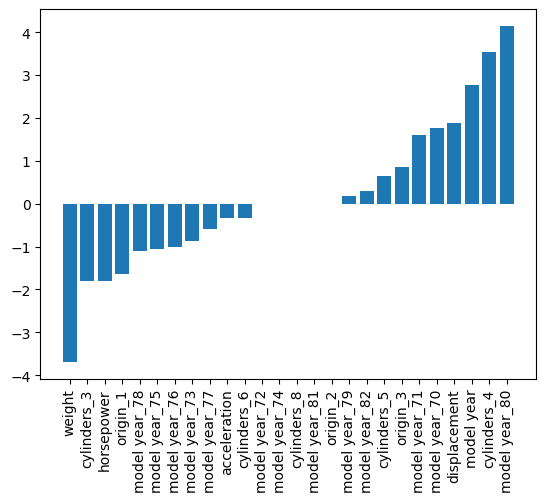

In [557]:
print('라쏘!')
target_data = mpg_df['mpg']
feature_data = mpg_df[mpg_df.columns.difference(['mpg'])]
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.2, random_state=52)
param = {'alpha': [0.001, 0.01, 0.1, 1,3,5, 10, 100]}
ls_model = Lasso()
GsCv_ls = GridSearchCV(estimator=ls_model, param_grid=param, scoring='neg_mean_squared_error',cv = 5,refit = True)
GsCv_ls.fit(X_train, y_train)
print('MSE : ',round(-1*GsCv_ls.best_score_,2))
print(f'최적 하이퍼 파라미터 : {GsCv_ls.best_params_}')
best_lasso_model = GsCv_ls.best_estimator_
print()

y_pred = best_lasso_model.predict(X_test)
r2  = r2_score(y_test, y_pred)
print(f'r2 : {round(r2,2)}')
lasso_coef_df= pd.DataFrame(best_lasso_model.coef_,feature_data.columns,columns=['coef'])
lasso_coef_df.sort_values(by='coef',inplace=True)
print(f'최적 모델의 회귀 계수 \n{lasso_coef_df}')

plt.bar(range(len(lasso_coef_df)), lasso_coef_df['coef'])
#plt.text(range(len(lasso_coef_df)),y= 0, lasso_coef_df.index)
plt.xticks(range(len(lasso_coef_df)), lasso_coef_df.index, rotation=90)


### 결과
- 가장 낮은 MSE를 갖으며 높은 R2를 가진 모델은 lasso모델
- 해당 최적 하이퍼파라미터는 alpha 0.01

### 로지스틱 회귀
- target: origin

In [587]:
#모듈 로딩
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#데이터 불러오기
mpg = pd.read_csv('../dataset/auto-mpg.csv')
mpg.rename(columns={'car name': 'car_name'}, inplace=True)
mpg['origin'] = mpg['origin'].astype('category')


#같은 차종의 마력의 평균으로 '?'대체
ques_car_name=mpg[mpg['horsepower']== '?'].car_name
mean_list=[]

x1 = mpg[mpg['car_name']==ques_car_name.iloc[0]].horsepower[1:].astype('int').mean()
x2 = mpg[mpg['car_name']==ques_car_name.iloc[1]].horsepower[mpg[mpg['car_name']==ques_car_name.iloc[1]].horsepower != '?'].astype('int').mean()
mpg.loc[32,'horsepower']= x1
mpg.loc[126,'horsepower']=x2
mpg.drop(mpg[mpg['horsepower']=='?'].index, inplace=True)
mpg['horsepower'].value_counts()
mpg['horsepower'] = mpg['horsepower'].astype('int64')
#


#데이터 표준화
ss_data = StandardScaler()
mpg_df = ss_data.fit_transform(mpg[mpg.columns[1:-2]])
mpg_df = pd.DataFrame(mpg_df,columns=mpg.columns[1:-2])
mpg_df = pd.concat([mpg_df, mpg[['mpg','origin']]], axis=1)
mpg_df
#데이터 결측치 제거
mpg_df.dropna(inplace=True)
mpg_df.isnull().sum()

#더미데이터 생성
model_year = pd.get_dummies(mpg['model year'], prefix='model year')
cylinders = pd.get_dummies(mpg['cylinders'], prefix='cylinders')
mpg_df = pd.concat([mpg_df, cylinders], axis=1)
mpg_df = pd.concat([mpg_df, model_year], axis=1)

#데이터 결측치 제거
mpg_df.dropna(inplace=True)
mpg_df.isnull().sum()
mpg_df.columns
# #데이터 분석

target_data = mpg_df['origin']
feature_data = mpg_df[mpg_df.columns.difference(['origin'])]
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.2, random_state=60)
LR = LogisticRegression()
GsCv_lr = GridSearchCV(LR, param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2', 'elasticnet'], 'solver':['lbfgs','liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']},cv=5, refit=True)
GsCv_lr.fit(X_train, y_train)


c:\Users\dddf\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\dddf\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\dddf\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\dddf\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\dddf\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\dddf\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

0.749974398361495

In [602]:

print(GsCv_lr.best_estimator_)
best_lr_model = GsCv_lr.best_estimator_
y_pred = best_lr_model.predict(X_test)
#lr_roc_auc_score = roc_auc_score(y_test, y_pred)
accuary = accuracy_score(y_test, y_pred)
#print("LR ROC AUC Score: ", lr_roc_auc_score)
print("LR Accuracy Score: ", round(accuary,2))
#회귀 계수
np.round(best_lr_model.coef_,2)

LogisticRegression(C=100, penalty='l1', solver='liblinear')
LR Accuracy Score:  0.73


array([[-6.000e-02, -4.840e+00, -2.460e+00,  3.300e+00, -1.240e+00,
         6.670e+00,  1.647e+01,  7.550e+00, -1.380e+00,  1.000e-02,
        -1.160e+00, -9.000e-02, -7.500e-01, -1.380e+00,  0.000e+00,
        -1.500e-01,  4.800e-01,  1.150e+00,  9.500e-01,  3.000e+00,
         8.900e-01,  2.830e+00,  2.850e+00, -3.500e-01, -3.580e+00],
       [-7.200e-01,  2.970e+00, -6.500e+00,  0.000e+00,  4.330e+00,
        -3.150e+00, -8.160e+00, -9.510e+00, -9.700e-01, -7.700e-01,
        -1.400e-01,  0.000e+00, -5.700e-01,  1.310e+00, -5.300e-01,
        -3.400e-01,  7.000e-02,  1.500e-01,  1.000e-02, -1.600e-01,
         3.000e-01, -2.180e+00, -9.800e-01,  5.000e-02,  5.650e+00],
       [ 4.600e-01,  1.410e+00,  7.100e+00, -9.800e-01, -3.920e+00,
        -1.390e+00, -8.440e+00, -6.700e-01,  1.750e+00,  1.630e+00,
         1.290e+00,  3.800e-01,  1.420e+00,  0.000e+00,  1.200e-01,
         9.000e-02, -1.280e+00, -1.950e+00, -1.880e+00, -4.430e+00,
        -3.010e+00, -3.400e+00, -4.220e+00,  2